### Seminar #1: Python crash course



#### Resources used to create this notebook
- python basics: https://www.w3schools.com/python/default.asp  

- numpy, scipy: https://harvard-iacs.github.io/2018-CS109A/labs/lab-1/student/

- [numpy beginner's guide](https://numpy.org/doc/stable/user/absolute_beginners.html)


#### Goals

Learning outcomes

- manipulate data types in Python
- vectorisation in Python
- read/write data with pandas
- plotting with matplotlib
- curve fit with scipy

#### Agenda
- python coding basics

    - data types
    - loops
    - if/else
    - objects and methods
    - functions
- intro to numpy
    - vectorization
    - lists vs. numpy arrays
- intro to pandas
    - read .csv
    - dataframe
- matplotlib
    - plotting data
- scipy
    - curve_fit
    - linear regression



### Spoiler
- By the end of this seminar you will be able to understand/reproduce/modify the following code

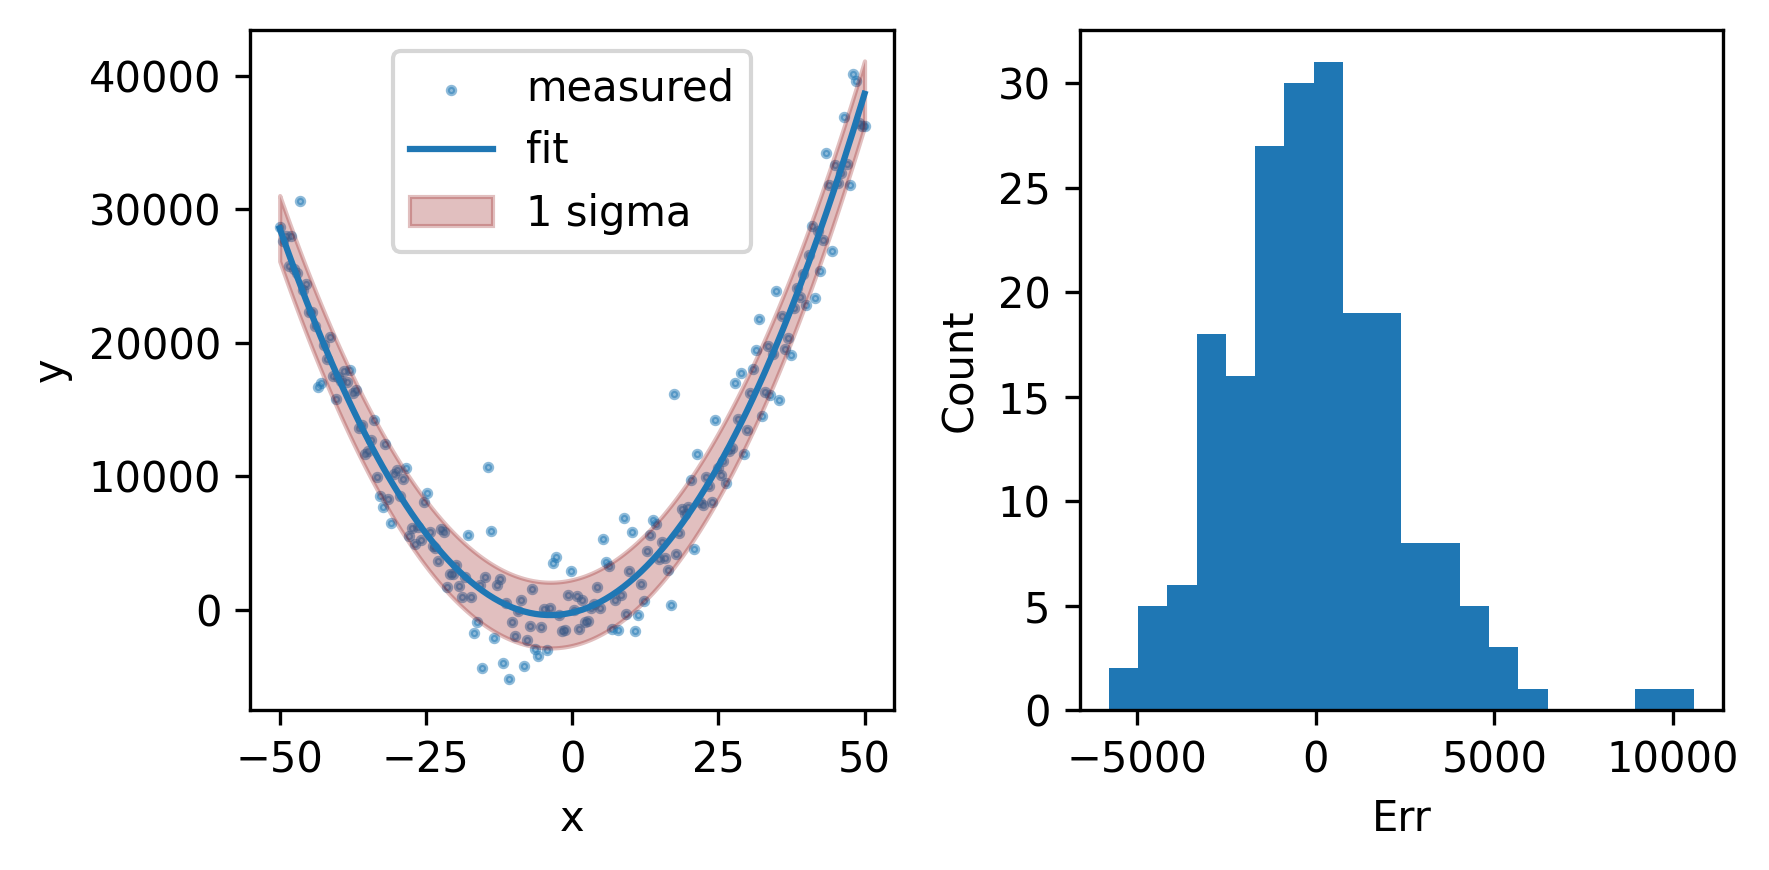

In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit   
import matplotlib.pyplot as plt

# toy example data, contains two columns - 'x' and 'y'
# y is a measured response to a change in x
data = pd.read_csv('data/measured_data.csv') 

plt.rcParams.update({'font.size': 10})
fig, (ax1, ax2) = plt.subplots(dpi = 300, figsize = (6, 3), ncols = 2)

x = data['x']
y = data['y']

ax1.scatter(x, y, marker = 'o', label = 'measured', s = 3, alpha = 0.5)



def parabola(x, a0, a1, a2):
    return a0 + a1 * x + a2 * x**2

popt, pcov = curve_fit(parabola, x, y)

y_fit = parabola(x, *popt)
ax1.plot(x, y_fit, label = 'fit')

_ = ax2.hist(y - y_fit, bins = 20)

ax2.set_xlabel('Err')
ax2.set_ylabel('Count')

std = (y - y_fit).std()

ax1.fill_between(x, y_fit - std, y_fit + std, alpha = 0.25, color = 'darkred', label = '1 sigma')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend()
plt.tight_layout()


#### Why learning python?
- the most popular programming language in science

- huge community
- open-source solutions for almost every problem
- simple syntax
- automation (as any programming language)

### Python basics

##### Variables and operators

Variables
- Variables are containers for storing data values

- Variables are created when you assign a data to it

- Variable name must start with a letter or the underscore character

- Comment line starts with # 

- Comment line is not executed





Operators
- Operators are used to perform operations with variables
- "+"
- "-" 
- '*'
- "/" 
- "//" 
- "%" 
- "!="
- "=="
- "**"
- ">", "<"
- ...

In [6]:
# coment line 
# not executed
# because it starts with #


var = 1     # integer
var_ = '1'  # string
_var = 1.0  # float
var1 = 1e0  # float
var_1 = 1/1 # float #DA integer in older versions of Python
_1vAr_ = 1
_VaR1__________ = 1


If you do not follow the rules, the interpreter will throw an error.

In [ ]:
1var = 1 

- Variable naming is up to you

- But it's recommended to follow the [PEP8](https://peps.python.org/pep-0008/) style guide


#### Built-in data types


- Text Type:	str

- Numeric Types:	int, float, complex
- Sequence Types:	list, tuple, range
- Mapping Type:	dict
- Set Types:	set, frozenset
- Boolean Type:	bool
- Binary Types:	bytes, bytearray, memoryview
- None Type:	NoneType

### Numbers
- integer
- float

In [ ]:
integer_number = 42
floating_point_number = .97


x = 1
y = 2

x + y  # addition
x - y  # subtraction
x / y  # division
x * y  # multiplication
y ** 3 # exponentiation

10  + (10)**(1/2)

### Strings

strings are defined with ```''```, ```""```, or ```""" """```

In [50]:
str_1 = 'My Name Is'
str_2 = "Slim Shady"

"+" operator concatenates the strings

In [ ]:
str_1 + str_2

"*" operator concatenates a string with itself

In [ ]:
str_1 * 5

There is a set of operators that works for specific data types. You cannot subtract one string from another 

In [ ]:
str_2 - str_1

### Containers
- lists
- dictionaries
- tuples

lists are defined with ```[]```

In [ ]:
my_list = [1, 3, 4,]
my_list

You can store whatever you want in a list


In [51]:
my_list = [str_1, str_2, 0, 5.0]

In [52]:
new_list = [my_list, my_list] # list of lists

Similarly to strings, the "+" operator concatenates two lists

In [ ]:
my_list + my_list

Similarly to strings, the "*" operator concatenates a list with itself

In [ ]:
my_list * 3

In [ ]:
my_list * 1.5

If you want to add two lists as two vectors, do it element-wise (will see it later)

dictionaries are defined with ```{key: value}```

In [ ]:
key = 'student_name'
value = 'Sebastian Pereira'

my_dict = {key: value}
my_dict

In [64]:
my_dict = { 
          # key: value  
          'student_name': 'Sebastian Pereira',
           53: [0.3, 'some_string'],
           }

You can ask for a value from your dictionary using ```my_dict[key]```

In [ ]:
key = 'student_name'
my_dict[key]

In [ ]:
my_dict[53]

#### Indexing and slicing
- numeration of the elements in python starts with 0

In [ ]:
my_list = [1, 3, 4,]
my_list[0]

the last element of th list can be asked by -1 index

In [ ]:
my_list[-1]

- for slicing use ":"

In [ ]:
my_list[0:3]

indexing is a feature of a specific data types (structures)
- lists, tuples, string

In [ ]:
val = 1
val[0]

lists are mutable

In [ ]:
my_list = [7, 12]
my_list[0] = -3
my_list

tuples are similar to lists, but immutable. these are defined with ()

In [12]:
my_tuple = (1, 2, 'f')


In [13]:
new_tuple = (my_tuple, my_tuple) # tuple of tuples


In [ ]:
new_tuple[1] = 7.0

### Objects and methods

Python is an object oriented programming language. There are objects in python. For example, lists and dictionaries are the objects. There are specific methods defined for each type of objects.


"Object-oriented programming (OOP) is a computer programming model that organizes software design around data, or objects, rather than functions and logic. An object can be defined as a data field that has unique attributes and behavior."

[source](https://www.techtarget.com/searchapparchitecture/definition/object-oriented-programming-OOP)

In [ ]:
my_list = [3, 5, 1, 5, 5, 5] # object

my_list.sort() # method

my_list


In [ ]:
my_list = [3, 5, 1, 5, 5, 5] # object
 
my_list.count(5) # method

In [ ]:
my_list = [3, 5, 1, 5, 5, 5] # object
 
my_list.append(5) # method

my_list.count(5) # method

In [ ]:
my_dict = {'Toyota': 'Celica'} # object

my_dict.update({'Nissan': 'Skyline'}) # method

my_dict

In [70]:
string = '10, 20, 30, 40' # object
string.split(',') # method

['10', ' 20', ' 30', ' 40']

#### Indentation, errors

In [ ]:
1/0

We can handle errors with try/except construction

In [ ]:
try:
    1/0 # indentation here
except:
    print('Error') # function

Indentation is used in python to indicate a block of a code (as seen above)
- 4 spaces or 1 tabulation

#### Functions

- A function is a block of code which only runs when it is called.

- You can pass data, known as Arguments, into a function.

- A function can return single or several objects or variables (or nothing)

[Resource link](https://www.w3schools.com/python/python_functions.asp)

There are built-in functions in python

https://docs.python.org/3/library/functions.html

In [ ]:
print('Hello World!')

In [ ]:
type('Hello World!')


In [ ]:
type(print)

In [ ]:
float('-1.0')

In [ ]:
int(float('-1.0'))

In [ ]:
round(-0.14934, 3)

In [ ]:
my_list = [4, 8, 15, 16, 23, 42, 8, 15, 16, 23, 42, 15, 16, 23, 42]
len(my_list)

In [ ]:
my_list = [4, 8, 15, 16, 23, 42, 8, 15, 16, 23, 42, 15, 16, 23, 42]

sum(my_list)

In [ ]:
my_list = [4, 8, 15, 16, 23, 42, 8, 15, 16, 23, 42, 15, 16, 23, 42]
zip(my_list, my_list)

In [ ]:
list(zip(my_list, my_list))

In [ ]:
help(list)

- A function is defined using the ```def``` keyword:

In [ ]:
def my_func(arg):
    """
    my first function
    
    returns a passed number - 1

    Params
    ------
    arg: data_type
        a comment about the input parameter

    Returns
    -------
    arg - 1
    """
    
    out = arg - 1
    return out



my_func(-50)

In [20]:
def nothing():
    """"
    this function does nothing
    which is achieved by the "pass" keyword


    the pass statement is used as a placeholder for future code.
    then the pass statement is executed, nothing happens, but you avoid getting an error when empty code is not allowed.

    """
    pass

nothing()

More python keywords

https://www.w3schools.com/python/python_ref_keywords.asp


#### if/else and iterations


element-wise summation

In [ ]:
list_1 = [0, 1, 2, 3]
list_2 = [3, 2, 1, 0]
list_sum = []

for item_1, item_2 in zip(list_1, list_2):
    item_3 = item_1 + item_2
    list_sum.append(item_3)
list_sum

In [23]:
my_list = [4, 8, 15, 16, 23, 42, 8, 15, 16, 23, 42, 15, 16, 23, 42]
for element in my_list:
    if element == 42:
        pass
    else:
        continue # do nothing but go to the next iteration step

In [ ]:
ids = []
my_list = [4, 8, 15, 16, 23, 42, 8, 15, 16, 23, 42, 15, 16, 23, 42]
for i, element in enumerate(my_list):
    if element == 42:
        print(element)
        ids.append(i)
    else:
        continue # do nothing but go to the next iteration step


In [ ]:
for index in ids:
    print(my_list[index])

In [ ]:
my_list = [4, 8, 15, 16, 23, 42, 8, 15, 16, 23, 42, 15, 16, 23, 42]
for i in range(len(my_list)):
    element = my_list[i]
    if element == 42:
        print(i, 'gotcha')
    else:
        continue # do nothing but go to the next iteration step

#### Modules

There are modules in Python. Some are installed by default, some are not. You need to import a module before using its methods. Your code always goes after the imports.

- to import a module in python use the following construction

```python
import name_of_the_module
```


- frequently modules in python consists of several parts (submodules) with a different functionality

- sometimes you want to import only a part of the module

```python
from module.submodule import some_name
```





In [ ]:
import os # operating system interface

# print the current working directory
print(os.getcwd())



In [ ]:
from os import getcwd 

# print the current working directory
print(getcwd())

### Task 1
- Write a function that finds a maximum element in a list and returns its index


In [154]:
def min_id(my_list):
    """
    this function find an inde of the largest number in a list

    Params
    ------
    my_list: list
    

    Returns
    ------
    an index of the largest element in a list
    """

    # your code here
    pass

#### Task 2

- Write a function that returns the number of times an element appears in a list

- Compare with the count() built-in function

In [ ]:
def count(my_list, element):
    """
    this function returns the number of occurrences of an item in a list.

    Params
    ------
    my_list: list
    
    element: any data object
        an element to count

    Returns
    ------
    the number of occurrences of an item in a list
    """

    # your code here
    pass


my_list = [4, 8, 15, 16, 23, 42, 8, 15, 16, 23, 42, 15, 16, 23, 42]

count(my_list, 8) == my_list.count(8), count(my_list, 0) == my_list.count(0)


#### Task 3

- Write a function that returns a dictionary containing unique elements as keys and their counters as values
- Compare your solution with the collections.Counter function

In [156]:
from collections import Counter

def counter_dict(my_list):

    """
    this function returns a dictionary with the number of occurrences of unique items in a list.

    Params
    ------
    my_list: list
    
    element: any data object
        an element to count

    Returns
    ------
    dictionary with numebr of occurances of unique elements in a list
    
    """
    pass

my_list = [4, 8, 15, 16, 23, 42, 8, 15, 16, 23, 42, 15, 16, 23, 42]


#### Important note:
In some cases, when you "link" two variables, changes to one may affect the other. This corresponds to lists and dicts and other mutable data types.

In [ ]:
list_1 = [1, 3, 2]
list_2 = list_1 # this is just a new name to the same object in memory
list_2.sort()
list_1 == list_2

To avoid it, you need to "unlink" the variables

In [ ]:
list_1 = [1, 3, 2]
list_2 = list_1.copy() # create a copy
list_2.sort()
list_1 == list_2

Use [x] * n with immutable x in your list as the resulting list will hold references to the x object.

In [ ]:
x = [1, 3]
ls = [x]
data = ls * 3 
data


In [ ]:
x[0] = 12
data

#### Read/Write text file

In [71]:
with open('new_file.txt', 'w') as file: #open(file_name, mode)
    line = 'x, y\n' # \n is used to go to the next line
    file.write(line)
    line2 = '10, 12\n'
    file.write(line2)
    line3 = '20, 24\n'
    file.write(line3)

with open('new_file.txt') as file:
    text = file.readlines()
    for line in text:
        print(line)

x, y

10, 12

20, 24



"r" - Read - Default value. Opens a file for reading, error if the file does not exist

"a" - Append - Opens a file for appending, creates the file if it does not exist

"w" - Write - Opens a file for writing, creates the file if it does not exist

"x" - Create - Creates the specified file, returns an error if the file exist

### Task 4

- read file data/measured_data.csv
- iterate over lines in the file

- collect x,  y variables into lists



### Numpy

"NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more"

[documentation](https://numpy.org/doc/stable/index.html)

[beginner's guide](https://numpy.org/doc/stable/user/absolute_beginners.html)

[additional resource](https://colab.research.google.com/github/ffund/ml-notebooks/blob/master/notebooks/1-python-numpy-tutorial.ipynb#scrollTo=6d444cd2-9cd7-4b1b-9471-b1f2938019a4)

numpy.array

In [45]:
# import
import numpy as np # np is used for a shorter notation and ease of use

In [ ]:
array = np.array([0, 1, 2, 3, 4]) # one dimensional array (rank 1 array)
array

shape of an array

In [ ]:
array.shape

its dimension

In [ ]:
array.ndim

In [ ]:
array = np.array([[1, 3, 3], [3, 5, 8]])
array

In [ ]:
array.shape

In [ ]:
array.ndim

slicing and indexing

In [70]:
data = np.array([1, 2, 3])

In [ ]:
# first element of an array
data[0]

In [ ]:
# slice of an array
data[0:2]

![bg](https://numpy.org/doc/stable/_images/np_indexing.png)

arrays are mutable similarly to lists

In [ ]:
data = np.array([9, 0, 1])
data[1] = 1
data

select a subset of arrays that fulfills a specified conditions

In [ ]:
data = np.array([i for i in range(10)])
data

In [ ]:
data[data < 5]

stacking

In [ ]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
np.hstack([a, b]) # horizontal stacking

In [ ]:
np.vstack([a, b]) # vertical stacking

add element(s)

In [ ]:
a = np.array([1, 2])
np.concatenate((a, [1, 3, 10]))

reshaping

In [ ]:
data = np.array([1, 2, 3, 4])
data.reshape(2, 2)

In [ ]:
data.reshape(2, 4)

creating basic arrays 

In [ ]:
ones = np.ones(8)
ones

In [ ]:
zeros = np.zeros(8)
zeros

In [ ]:
integer_sequence = np.arange(5, 18, 3)
integer_sequence

In [ ]:
np.linspace(0, 10, 50) # linearly spaced values

basic operations with numpy arrays

In [320]:
a = np.ones(3)
b = np.ones(3) * 5 # broadcasting
b[-1] = 0.3

![bg](https://numpy.org/doc/stable/_images/np_multiply_broadcasting.png)

In [ ]:
a + b

In [ ]:
a * b

In [ ]:
a / b

In [ ]:
a[0] = 0 
b / a 

sorting

In [ ]:
a = [5, 3, 8, 6, 1, 0]
np.array(a)

In [ ]:
a.sort()
a

useful operations

In [144]:
data = np.array([0, 4, 6, 9, 2, 4])

In [ ]:
data.min()

In [ ]:
data.max()

In [ ]:
data.mean()

In [ ]:
data.sum()

In [188]:
data = np.array([[1, 2], [5, 3], [4, 6]])

In [ ]:
data.max(axis = 0)

![bg](https://numpy.org/doc/stable/_images/np_matrix_aggregation_row.png)

In [ ]:
data.max(axis = 1)

operations with matrices and vectors

In [336]:
I = np.identity(3)
M = np.array([[2, 3, 1], [1, 0, 1], [0, 0, 1]])



In [ ]:
# element-wise multiplication
I * M

In [ ]:
np.multiply(I, M) # same thing

In [ ]:
# dot product
np.dot(I, M)

In [ ]:
I @ M # same thing

In [ ]:
vector = np.array([1, 0, 2])
np.dot(vector, M)

In [ ]:
np.dot(M, vector) # note the difference, order matters

In [ ]:
# cross product of two vectors
v1 = np.array([1, 2, 3])
v2 = np.array([2, 1, 1])
np.cross(v1, v2)

In [ ]:
# transpose 
M.T

```np.linalg``` is used for linear algebra operations

In [ ]:
# inverse matrix
np.linalg.inv(M)

In [ ]:
v = np.array([0, 4, 8])
np.linalg.norm(v) # norm of a vector

In [ ]:
np.linalg.norm(M, axis = 1) # norm along the axis

### Task 5: Volume of a parallelepiped

Write a function that calculates a volume of the parallepiped determined by three vectors

Hint: Mixed dot product

In [350]:
def volume(v1, v2, v3):
    """
    This function calculates volume of 
    the parallepiped determined by three vectors

    Prameters
    --------
    v1: np.array
    v2: np.array
    v3: np.array

    Returns
    -------
    volume of a parallelepiped

    """


    pass

### Matplotlib
"Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible."
[documentation](https://matplotlib.org/)

In [351]:
import matplotlib.pyplot as plt

basic plot

In [ ]:
x = np.linspace(0, 10, 20)
y = np.sin(x)

plt.plot(x, y)

subplots (provides more flexibility)

In [ ]:
fig, ax = plt.subplots() # create figure and axis

ax.plot(x, y)
ax.plot(x, y/2)
ax.plot(x, y/4)
ax.plot(x, y/8)

In [ ]:
fig, (ax1, ax2) = plt.subplots(dpi = 150, ncols = 2, figsize = (6, 3)) # figure with 150 dpi resolution, 2 horizontal subplots

ax1.plot(x, y)
ax2.plot(x, -y)


In [ ]:
fig, axes = plt.subplots(dpi = 150, ncols = 2, figsize = (6, 3)) # same thing

axes[0].plot(x, y)
axes[1].plot(x, -y)


plot adjustments and annotation

In [ ]:
fig, ax = plt.subplots(dpi = 150, ncols = 1, figsize = (6, 2)) 

ax.plot(x, y, label = 'sin(x)')
ax.set_xlabel('x label')
ax.set_ylabel('y label')
ax.set_title('y = sin(x)')
ax.grid()

ax.set_xlim(0, 10)
ax.set_ylim(-1, 1)
ax.legend()


plot a histogram

In [ ]:
x = np.random.normal(size = 10000, loc = 0.5, scale = 0.1) # Draw random samples from a normal (Gaussian) distribution

fig, ax = plt.subplots(dpi = 150)
_ = ax.hist(x, bins = 100)

ax.set_title('normal distribution')
ax.set_xlabel('x label')
ax.set_ylabel('Count')

plot a scatter plot

In [ ]:
x = np.random.normal(size = 10000, loc = 0.5, scale = 0.1) # Draw random samples from a normal (Gaussian) distribution
y = np.random.normal(size = 10000, loc = 0.5, scale = 0.1) # Draw random samples from a normal (Gaussian) distribution
colors = np.linspace(0, 1, len(x))

fig, ax = plt.subplots(dpi = 200, figsize = (3, 3))
ax.scatter(x, y, s = 10, marker = 'x', alpha = 0.5, c = colors)

ax.set_xlabel('x label')
ax.set_ylabel('y label')

plt.tight_layout()

### Pandas
"pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language."

[documentation](https://pandas.pydata.org/docs/)
[getting started](https://pandas.pydata.org/docs/getting_started/index.html#getting-started)

In [354]:
import pandas as pd # pd is used for a shorter notation and ease of use

Pandas DataFrame is the main object of manipulation. Think of it as a table.

![bg](https://pandas.pydata.org/docs/_images/01_table_dataframe.svg)

create a DataFrame

In [ ]:
first_names = ['John', 'Ivan', 'Stan']
df = pd.DataFrame(data = first_names, columns = ['first_name'])
df

add column

In [356]:
second_names = ['Doe', 'Ivanov', 'Smith']
df['second_name'] = second_names

In [ ]:
df

concatenate two dataframes

In [358]:
df_new = pd.concat([df, df])

get column names 

In [ ]:
df_new.columns

query column elements

In [ ]:
df_new['first_name']

query raw elements by integer index (similarly to the slicing of numpy arrays)

In [ ]:
df_new.iloc[1]

query raw elements by index label

In [ ]:
df_new.loc[1]

reset index labels

In [ ]:
df_new.reset_index(drop = True)

get info about the dataframe

In [ ]:
df_new.info()

reading data with pandas

![bg](https://pandas.pydata.org/docs/_images/02_io_readwrite.svg)

read .csv file

In [395]:
data1 = pd.read_csv('data/bandgap_data_Na-P-S.csv')
data2 = pd.read_csv('data/energy_per_atom_data_Na-P-S.csv')

In [ ]:
data1.head(5) # show first 5 entries

In [ ]:
data1.tail(5) # show last 5 entries

In [ ]:
data2.head(5)

merge two tables

In [408]:
data = data1.merge(data2)

In [ ]:
data

sort table by a given column

In [ ]:
data_sorted = data.sort_values(by = 'energy_per_atom')
data_sorted

group data by some column and apply some operation to the resulting groups

In [ ]:
data_grouped = data_sorted.groupby('formula_pretty').first()
data_grouped

In [428]:
data_grouped = data_grouped.reset_index()

In [ ]:
data_grouped

get subsample

In [ ]:
data_grouped[data_grouped['chemsys'] == 'Na-P']

save the table

In [443]:
# data_grouped.to_csv('data/data.csv', index = False)

### Task 6:
- Plot the distribution of band gap values ​​for the materials of the Na-P-S chemical system presented in the table
- Plot the bandgap vs. energy_per_atoms scatterp for materials with the band gap > 0.5



### Scipy
"SciPy provides algorithms for optimization, integration, interpolation, eigenvalue problems, algebraic equations, differential equations, statistics and many other classes of problems."

[documentation](https://docs.scipy.org/doc/scipy/)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from pandas import pandas

from scipy.stats import linregress
from scipy.optimize import curve_fit    



def noise(x, mean = 0.0, std = 2500.0):
    y = np.random.normal(size = len(x), loc = mean, scale = std)
    return y


def parabola(x, a0 = -5.0, a1 = 100.0, a2 = 13.4):
    return a0 + a1 * x + a2 * x**2




plt.rcParams.update({'font.size': 10})
fig, (ax1, ax2) = plt.subplots(dpi = 300, figsize = (6, 3), ncols = 2)

x = np.linspace(-50, 50, 200)
y = parabola(x) + noise(x)

ax1.scatter(x, y, marker = 'o', label = 'measured', s = 3, alpha = 0.5)
ax1.plot(x, parabola(x), label = 'ideal', alpha = 0.5)


popt, pcov = curve_fit(parabola, x, y)

y_fit = parabola(x, *popt)
ax1.plot(x, y_fit, label = 'fit')

_ = ax2.hist(y - y_fit, bins = 20)

ax2.set_xlabel('Err')
ax2.set_ylabel('Count')

std = (y - y_fit).std()


ax1.fill_between(x, y_fit - std, y_fit + std, alpha = 0.25, color = 'darkred', label = '1 sigma')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend()
plt.tight_layout()


### About solving your homework
Don't know how to solve the problem? 

- Use Google, ask stackoverflow

Don't understand a bug/error in your code?

- Use Google, ask stackoverflow

Still having problems?

- Ask a TA